In [ ]:
pip install nltk

In [ ]:
pip install plotly

In [ ]:
pip install nbformat

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os

#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

pd.options.plotting.backend = "plotly"

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gkw20\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df1 = pd.read_csv('SentimentDataset/Twitter.csv')
df1.head()

clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0

In [3]:
df2 = pd.read_csv('SentimentDataset/AirlineTweets.csv')
df2 = df2.rename(columns={'text': 'clean_text', 'airline_sentiment':'category'})
df2['category'] = df2['category'].map({'negative': -1.0, 'neutral': 0.0, 'positive':1.0})
df2 = df2[['category','clean_text']]
df2.head()

category                                         clean_text
0       0.0                @VirginAmerica What @dhepburn said.
1       1.0  @VirginAmerica plus you've added commercials t...
2       0.0  @VirginAmerica I didn't today... Must mean I n...
3      -1.0  @VirginAmerica it's really aggressive to blast...
4      -1.0  @VirginAmerica and it's a really big bad thing...

In [4]:
df = pd.concat([df1, df2], ignore_index=True)

In [5]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [6]:
df.dropna(axis=0, inplace=True)

In [7]:
df.shape

(177609, 2)

In [8]:
df['category'] = df['category'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})

# Output first five rows
df.head()

clean_text  category
0  when modi promised “minimum government maximum...  Negative
1  talk all the nonsense and continue all the dra...   Neutral
2  what did just say vote for modi  welcome bjp t...  Positive
3  asking his supporters prefix chowkidar their n...  Positive
4  answer who among these the most powerful world...  Positive

In [9]:
df.groupby('category').count().plot(kind='bar')

In [10]:
import plotly.express as px
fig = px.pie(df, names='category', title ='Pie chart of different sentiments of tweets')
fig.show()

In [11]:
df.drop([], axis=1, inplace=True)
df.head

<bound method NDFrame.head of                                                clean_text  category
0       when modi promised “minimum government maximum...  Negative
1       talk all the nonsense and continue all the dra...   Neutral
2       what did just say vote for modi  welcome bjp t...  Positive
3       asking his supporters prefix chowkidar their n...  Positive
4       answer who among these the most powerful world...  Positive
...                                                   ...       ...
177615  @AmericanAir thank you we got on a different f...  Positive
177616  @AmericanAir leaving over 20 minutes Late Flig...  Negative
177617  @AmericanAir Please bring American Airlines to...   Neutral
177618  @AmericanAir you have my money, you change my ...  Negative
177619  @AmericanAir we have 8 ppl so we need 2 know h...   Neutral

[177609 rows x 2 columns]>

In [ ]:
pip install wordcloud

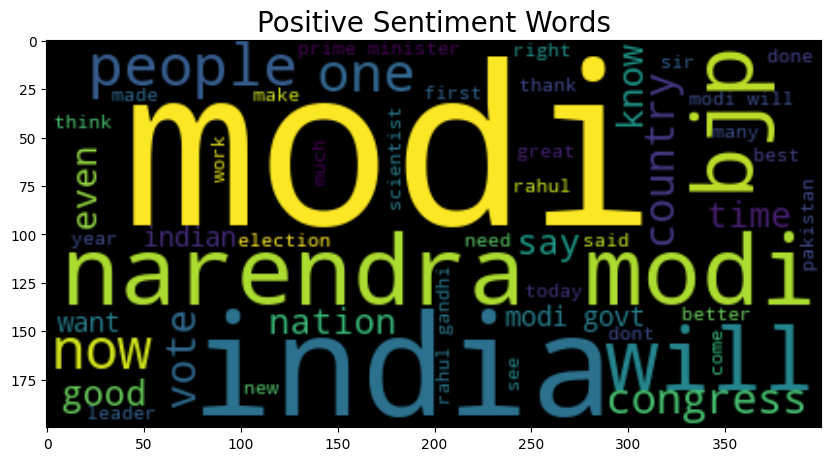

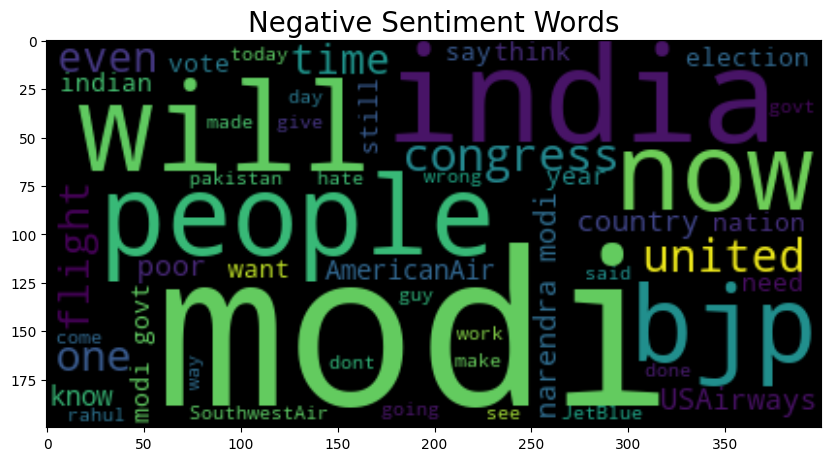

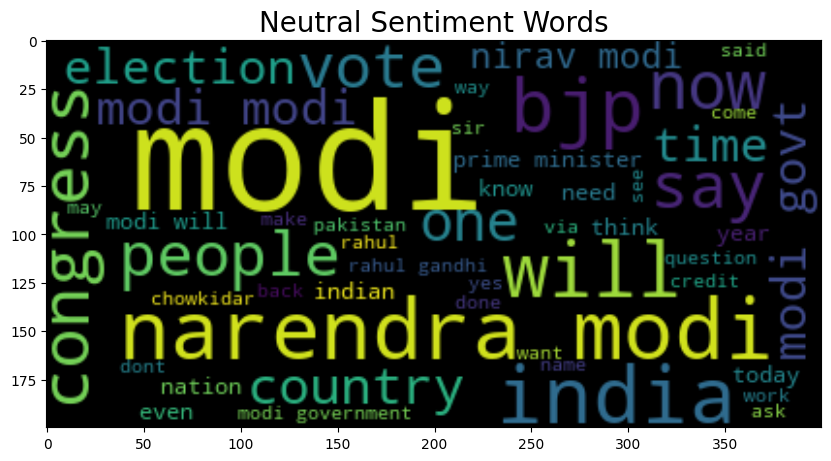

In [14]:
from wordcloud import WordCloud, STOPWORDS

def wordcount_gen(df, category):

    # Combine all tweets
    combined_tweets = " ".join([tweet for tweet in df[df.category==category]['clean_text']])
                          
    # Initialize wordcloud object
    wc = WordCloud(max_words=50, 
                   stopwords = STOPWORDS)

    # Generate and plot wordcloud
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets),interpolation = 'bilinear')
    plt.title('{} Sentiment Words'.format(category), fontsize=20)
    plt.show()
    
# Positive tweet words
wordcount_gen(df, 'Positive')
     
# Negative tweet words
wordcount_gen(df, 'Negative')
     
# Neutral tweet words
wordcount_gen(df, 'Neutral')

In [15]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", df['clean_text'][0])
print("\nProcessed tweet ->", tweet_to_words(df['clean_text'][0]))


Original tweet -> when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples

Processed tweet -> ['modi', 'promis', 'minimum', 'govern', 'maximum', 'govern', 'expect', 'begin', 'difficult', 'job', 'reform', 'state', 'take', 'year', 'get', 'justic', 'state', 'busi', 'exit', 'psu', 'templ']


In [16]:
X = list(map(tweet_to_words, df['clean_text']))

In [17]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(df['category'])

In [18]:
print(X[0])
print(Y[0])

['modi', 'promis', 'minimum', 'govern', 'maximum', 'govern', 'expect', 'begin', 'difficult', 'job', 'reform', 'state', 'take', 'year', 'get', 'justic', 'state', 'busi', 'exit', 'psu', 'templ']
0


Train and Test

In [19]:
y = pd.get_dummies(df['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

BOW

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in 
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

d:\fyp1\ReactDjango4\venv\Lib\site-packages\sklearn\feature_extraction\text.py:523: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [21]:
print(count_vector.get_feature_names_out()[0:200])

['000' '1' '10' '100' '1000' '10000' '108' '10th' '10yr' '11' '111' '1145'
 '12' '1200' '12000' '125' '12k' '130' '140' '14000' '15' '150' '1500'
 '1500000' '1520' '157200000' '15l' '15lac' '15lakh' '180' '1947' '1962'
 '1969' '1971' '1980' '1984' '1998' '1k' '1st' '2' '20' '200' '2000'
 '2002' '2004' '2007' '2008' '2009' '2010' '2011' '2012' '201213' '2013'
 '2014' '2015' '2016' '2017' '201718' '2018' '2019' '2020' '2022' '2024'
 '2025' '2029' '21st' '23rd' '24' '247' '24x7' '25' '250' '2611' '26th'
 '272' '27th' '280319' '28th' '29th' '2cr' '2day' '2nd' '3' '30' '300'
 '3000' '30000' '300km' '31st' '350' '35a' '370' '3700' '3rd' '4' '40'
 '400' '4000' '45' '456' '4th' '5' '50' '500' '5000' '50000' '5th' '5year'
 '5yr' '6' '600' '6000' '60yr' '6th' '7' '70yr' '72000' '7200000' '72k'
 '7th' '8' '800' '8020' '9' '90' '9000' 'aa' 'aadhaar' 'aadhar' 'aadmi'
 'aag' 'aaj' 'aalo' 'aam' 'aan' 'aap' 'aapk' 'aapko' 'aapn' 'aay' 'aaya'
 'aayega' 'aayog' 'abandon' 'abdul' 'abdullah' 'abe' 'abhi' 

tokenizing and padding

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['clean_text'][0])
X, tokenizer = tokenize_pad_sequences(df['clean_text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples
After Tokenization & Padding 
 [  40    1  339   72 1872 1158   43 2434    2 1281  218    2  238   32
  163  103   53   58 1170  238   50    3    6  532    3   50 3796    3
 3025    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [21]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

train test split

In [22]:
y = pd.get_dummies(df['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (106565, 50) (106565, 3)
Validation Set -> (35522, 50) (35522, 3)
Test Set -> (35522, 50) (35522, 3)


In [23]:
import keras.backend as K

def f1_score(precision, recall):
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

bidirectional LSTM

In [24]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 5000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

c:\Users\gkw20\anaconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.

c:\Users\gkw20\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



In [25]:

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5525 - loss: 0.9098 - precision: 0.6342 - recall: 0.3315 - val_accuracy: 0.8908 - val_loss: 0.3322 - val_precision: 0.8953 - val_recall: 0.8862
Epoch 2/20
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9040 - loss: 0.3122 - precision: 0.9097 - recall: 0.8975 - val_accuracy: 0.9171 - val_loss: 0.2673 - val_precision: 0.9243 - val_recall: 0.9106
Epoch 3/20
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9229 - loss: 0.2581 - precision: 0.9298 - recall: 0.9166 - val_accuracy: 0.9229 - val_loss: 0.2487 - val_precision: 0.9302 - val_recall: 0.9168
Epoch 4/20
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9271 - loss: 0.2494 - precision: 0.9341 - recall: 0.9196 - val_accuracy: 0.9280 - val_loss: 0.2384 - val_precision: 0.9344 - val_recall: 0.9219
Epoch 5/20
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9332 - loss: 0.2310 - precision: 0.9401 - recall: 0.9254 - val_accuracy: 0.9303

In [26]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 50, 32)         │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 50, 32)         │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 25, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 359,880 (1.37 MB)

 Trainable params: 179,939 (702.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 179,941 (702.90 KB)

None


model accuracy

In [27]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.9198
Precision : 0.9252
Recall    : 0.9151
F1 Score  : 0.9201


In [35]:
from sklearn.metrics import classification_report

# Predict the classes for the test set
y_pred = model.predict(X_test).argmax(axis=1)
y_true = y_test.values.argmax(axis=1)

# Generate the classification report
report = classification_report(y_true, y_pred, target_names=['Negative', 'Neutral', 'Positive'])

print(report)

1111/1111 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

    Negative       0.93      0.83      0.88      9059
     Neutral       0.92      0.95      0.93     11684
    Positive       0.91      0.95      0.93     14779

    accuracy                           0.92     35522
   macro avg       0.92      0.91      0.91     35522
weighted avg       0.92      0.92      0.92     35522



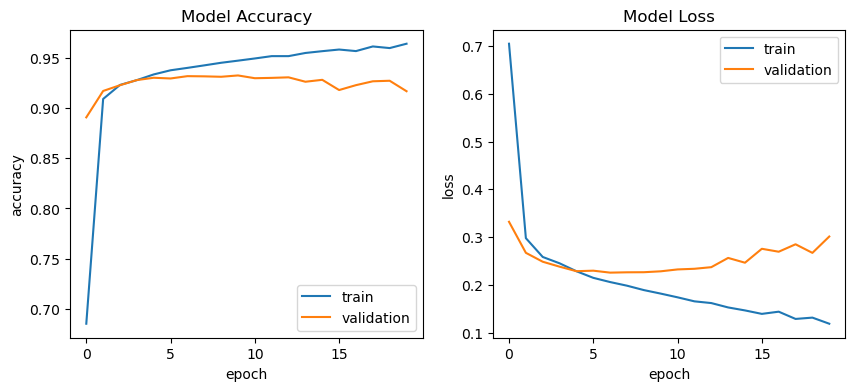

In [28]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

1111/1111 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


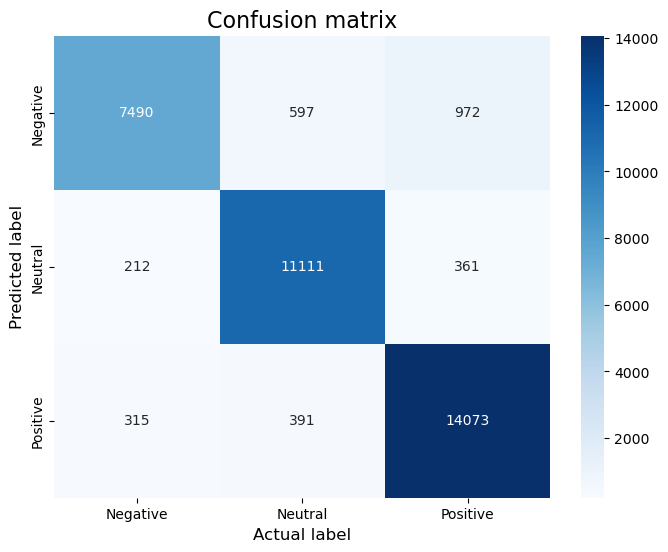

In [29]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)

In [30]:
model.save('sentiment_model.h5')
print('model saved')

model saved


TESTING

In [31]:
from keras.models import load_model

# Load model
model = load_model('sentiment_model.h5')

def predict_class(text):
    '''Function to predict sentiment class of the passed text'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    max_len=50
    
    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt = model.predict(xt).argmax(axis=1)
    # Print the predicted sentiment
    print('The predicted sentiment is', sentiment_classes[yt[0]])

In [32]:
predict_class(['i am happy'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
The predicted sentiment is Positive


In [33]:
predict_class(['The code appears to be structured correctly and follows standard practices.'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The predicted sentiment is Neutral


In [34]:
predict_class(["Your approach to coding shows a thoughtful and meticulous attention to detail."])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The predicted sentiment is Neutral
